# <font face="Arial" color="green">General description</font>

<h1 class="dataset-header-v2__title">Synthetic Financial Datasets For Fraud Detection</h1>

<div class="markdown-converter__text--rendered"><h1>Context</h1>
<p>There is a lack of public available datasets on financial services and specially in the emerging mobile money transactions domain. Financial datasets are important to many researchers and in particular to us performing research in the domain of fraud detection. Part of the problem is the intrinsically private nature of financial transactions, that leads to no publicly available datasets.</p>
<p>We present a synthetic dataset generated using the simulator called PaySim as an approach to such a problem. PaySim uses aggregated data from the private dataset to generate a synthetic dataset that resembles the normal operation of transactions and injects malicious behaviour to later evaluate the performance of fraud detection methods.</p>
<h1>Content</h1>
<p>PaySim simulates mobile money transactions based on a sample of real transactions extracted from one month of financial logs from a mobile money service implemented in an African country. The original logs were provided by a multinational company, who is  the provider of the mobile financial service which is currently running in more than 14 countries all around the world.</p>
<p>This synthetic dataset is scaled down 1/4 of the original dataset and it is created just for Kaggle.</p>
<h1>Headers</h1>
<p>This is a sample of 1 row with headers explanation:</p>
<p>1,PAYMENT,1060.31,C429214117,1089.0,28.69,M1591654462,0.0,0.0,0,0</p>
<p>step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).</p>
<p>type - CASH-IN, CASH-OUT, DEBIT, PAYMENT  and TRANSFER.</p>
<p>amount -<br>
 amount of the transaction in local currency.</p>
<p>nameOrig - customer who started the transaction</p>
<p>oldbalanceOrg - initial balance before the transaction</p>
<p>newbalanceOrig - new balance after the transaction</p>
<p>nameDest - customer who is the recipient of the transaction</p>
<p>oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).</p>
<p>newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).</p>
<p>isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.</p>
<p>isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.</p>
<h1>Past Research</h1>
<p>There are 5 similar files that contain the run of 5 different scenarios. These files are better explained at my PhD thesis chapter 7 (PhD Thesis Available here <a rel="noreferrer nofollow" href="http://urn.kb.se/resolve?urn=urn:nbn:se:bth-12932)">http://urn.kb.se/resolve?urn=urn:nbn:se:bth-12932)</a>.</p>
<p>We ran PaySim several times using random seeds for 744 steps, representing each hour of one month of real time, which matches the original logs. Each run took around 45 minutes on an i7 intel processor with 16GB of RAM. The final result of a run contains approximately 24 million of financial records divided into the 5 types of categories: CASH-IN, CASH-OUT, DEBIT, PAYMENT  and TRANSFER.</p>
<h1>Acknowledgements</h1>
<p>This work is part of the research project ”Scalable resource-efficient systems for big data analytics” funded<br>
by the Knowledge Foundation (grant: 20140032) in Sweden.</p>
<p>Please refer to this dataset using the following citations: </p>
<p>PaySim first paper of the simulator:</p>
<p>E. A. Lopez-Rojas , A. Elmir, and S. Axelsson. "PaySim: A financial mobile money simulator for fraud detection". In: The 28th European Modeling and Simulation Symposium-EMSS, Larnaca, Cyprus. 2016</p></div>


https://www.kaggle.com/ealaxi/paysim1

# <font face="Arial" color="green">Library Imports</font>

In [2]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from math import ceil
from math import floor

warnings.filterwarnings("ignore")

# <font face="Arial" color="green">Helper functions</font>

In [4]:
def jupyter_settings():
    
    pd.options.display.max_columns = None   
    


warnings.filterwarnings("ignore")
jupyter_settings()

# 1 - Data import and basic inspection 

## 1.1 data loading and checking

In [5]:
from google.colab import drive 

link = 'https://drive.google.com/file/d/1CE6zTV3LBRHo_TSaw8SQ47owkcaPPfhw/view'
  
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
# Data load

df = pd.read_csv('/content/gdrive/Othercomputers/Meu modelo Laptop/Doutorado - v2020/Pós Ciência de Dados/TCC/TCC Fraud/PS_20174392719_1491204439457_log.csv')

df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
# Data dimensions

print('\nData dimensions:\n')
print('Number of rows: {}'.format(df.shape[0]))
print('Number of columns: {}'.format(df.shape[1]))


Data dimensions:

Number of rows: 6362620
Number of columns: 11


In [8]:
# Checking data types

df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [9]:
# Checking data info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [10]:
# Checking for NA's

df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [11]:
# Checking for duplicate rows

df.duplicated().sum()

0

In [12]:
df[df.duplicated()]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [13]:
# Response variable

df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [14]:
# Response variable - Percentage

print('Percentage of Non-Fraud transactions: {}'.format(df['isFraud'].value_counts()[0]/df.shape[0]))
print('Percentage of Non-Fraud transactions: {}'.format(df['isFraud'].value_counts()[1]/df.shape[0]))

Percentage of Non-Fraud transactions: 0.9987091795518198
Percentage of Non-Fraud transactions: 0.001290820448180152


## 1.2 descriptive statistics

### 1.2.1 descriptive statistics

In [15]:
# Numerical and categorical attributes

num_attrib = df.select_dtypes(include=['int64', 'float64']) # numerical attributes

cat_attrib = df.select_dtypes(exclude=['int64', 'float64']) # categorical attributes

In [16]:
# Descriptive statistics

pd.DataFrame(data=[num_attrib.apply(np.min),
          num_attrib.apply(np.max),
          num_attrib.apply(lambda x: np.max(x) - np.min(x)),
          num_attrib.apply(np.mean),
          num_attrib.apply(np.median),
          num_attrib.apply(np.std),
          num_attrib.apply(lambda x: x.skew()),
          num_attrib.apply(lambda x: x.kurtosis())],
             
             index=np.array(['min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis'])).transpose()

,min,max,range,mean,median,std,skew,kurtosis
step,1.0,7.430000e+02,7.420000e+02,2.433972e+02,239.000,1.423320e+02,0.375177,0.329071
amount,0.0,9.244552e+07,9.244552e+07,1.798619e+05,74871.940,6.038582e+05,30.993949,1797.956705
oldbalanceOrg,0.0,5.958504e+07,5.958504e+07,8.338831e+05,14208.000,2.888242e+06,5.249136,32.964879
newbalanceOrig,0.0,4.958504e+07,4.958504e+07,8.551137e+05,0.000,2.924048e+06,5.176884,32.066985
oldbalanceDest,0.0,3.560159e+08,3.560159e+08,1.100702e+06,132705.665,3.399180e+06,19.921758,948.674125
newbalanceDest,0.0,3.561793e+08,3.561793e+08,1.224996e+06,214661.440,3.674129e+06,19.352302,862.156508
isFraud,0.0,1.000000e+00,1.000000e+00,1.290820e-03,0.000,3.590479e-02,27.779538,769.702982
isFlaggedFraud,0.0,1.000000e+00,1.000000e+00,2.514687e-06,0.000,1.585775e-03,630.603629,397659.062500


### 1.2.2 general view of attributes

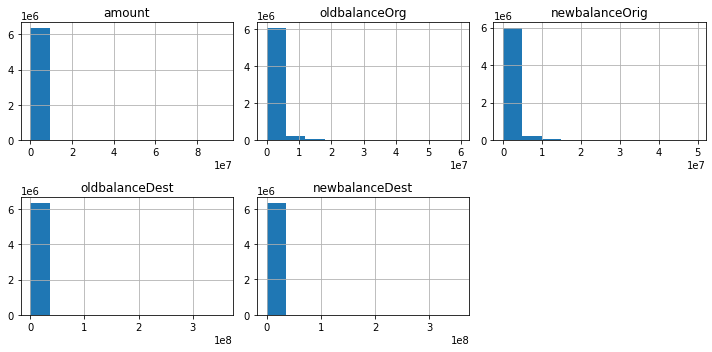

In [17]:
# Numerical attribute view

# Exploring continuous attributes

num_attrib.select_dtypes('float64').hist(figsize=(10,5),layout=(2,3))
plt.tight_layout();

In [18]:
# Exploring 'amount' - Counts and bins

counts, bins = np.histogram(num_attrib.loc[num_attrib['amount']>0, 'amount'], 
                               bins=20, 
                               range=(num_attrib.loc[num_attrib['amount']>0, 'amount'].min(),
                                      num_attrib.loc[num_attrib['amount']>0, 'amount'].max()))

In [19]:
counts

array([6350041,    6419,    4533,     657,     326,     207,     143,
           113,      64,      23,      34,      18,      11,       8,
             2,       4,       0,       0,       0,       1])

In [20]:
bins

array([1.00000000e-02, 4.62227584e+06, 9.24455167e+06, 1.38668275e+07,
       1.84891033e+07, 2.31113792e+07, 2.77336550e+07, 3.23559308e+07,
       3.69782067e+07, 4.16004825e+07, 4.62227583e+07, 5.08450342e+07,
       5.54673100e+07, 6.00895858e+07, 6.47118617e+07, 6.93341375e+07,
       7.39564133e+07, 7.85786891e+07, 8.32009650e+07, 8.78232408e+07,
       9.24455166e+07])

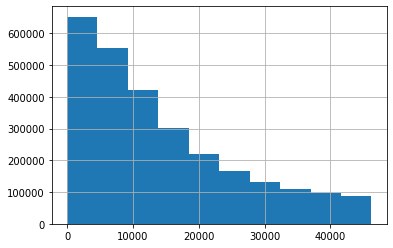

In [21]:
# Most of transactions involves amount lower than 40000

num_attrib.loc[num_attrib['amount']<4.62227584e+04, 'amount'].hist()

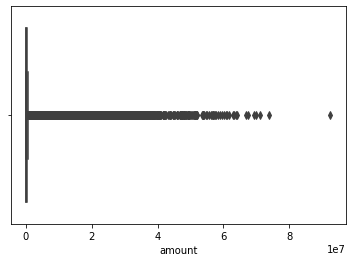

In [22]:
# However there are lots of outliers - higher amount transactions 

sns.boxplot(num_attrib.loc[num_attrib['amount']>0, 'amount'], orient='h')

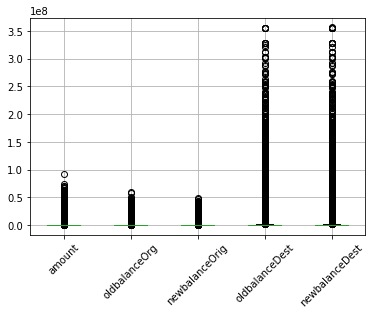

In [23]:
# Boxplot of continuous variables - lots of outliers

df.select_dtypes('float64').boxplot(rot=45)

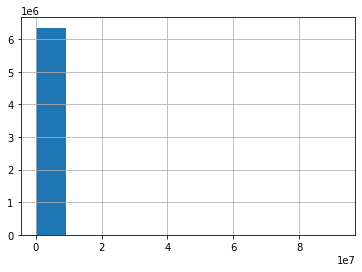

In [24]:
# The frequencies of transactions of higher amounts are extremy low 
## and are supressed by most frequent transactions

num_attrib.loc[:, 'amount'].hist()

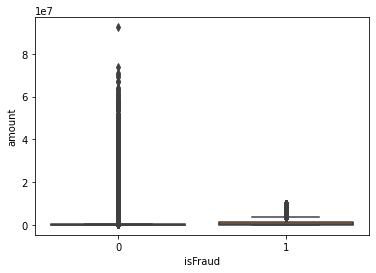

In [25]:
# Boxplot - 'amount'

sns.boxplot(x='isFraud', y='amount', data=num_attrib)

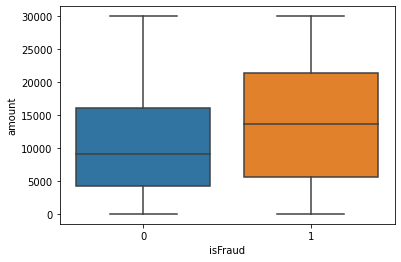

In [26]:
# Boxplot - 'amount' (expanded)

sns.boxplot(x='isFraud', y='amount', data=num_attrib[num_attrib['amount']<3.0e+04])



In [27]:
# Categorical attributes check

cat_attrib

,type,nameOrig,nameDest
0,PAYMENT,C1231006815,M1979787155
1,PAYMENT,C1666544295,M2044282225
2,TRANSFER,C1305486145,C553264065
3,CASH_OUT,C840083671,C38997010
4,PAYMENT,C2048537720,M1230701703
...,...,...,...
6362615,CASH_OUT,C786484425,C776919290
6362616,TRANSFER,C1529008245,C1881841831
6362617,CASH_OUT,C1162922333,C1365125890
6362618,TRANSFER,C1685995037,C2080388513


In [28]:
# Categorical attributes view

# Unbalanced data makes direct comparisons dificult - we normalized the data here

cat_view = pd.DataFrame(df[['isFraud','type']].groupby(['isFraud','type']).size().reset_index())

cat_view.columns = ['isFraud','type', 'count']

#column 'norm_count' - normalizing by the total count of each category in the column 'isFraud'
cat_view.loc[cat_view['isFraud']==1,'norm_count'] = cat_view['count'] / cat_view.loc[cat_view['isFraud']==1, 'count'].sum()

cat_view.loc[cat_view['isFraud']==0,'norm_count'] = cat_view['count'] / cat_view.loc[cat_view['isFraud']==0, 'count'].sum()

cat_view

,isFraud,type,count,norm_count
0,0,CASH_IN,1399284,0.220207
1,0,CASH_OUT,2233384,0.351470
2,0,DEBIT,41432,0.006520
3,0,PAYMENT,2151495,0.338583
4,0,TRANSFER,528812,0.083220
5,1,CASH_OUT,4116,0.501157
6,1,TRANSFER,4097,0.498843


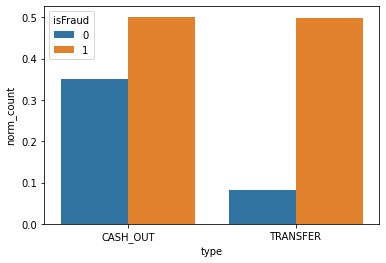

In [29]:
# There is no CASH_IN, DEBIT, PAYMENT in fraud transactions - 'type' variable might be important

# Let's compare CASH_OUT and TRANSFER

# When there is fraud percentage of CASH_OUT and TRANSFER transactions are higher compared to when there is not

sns.barplot(x='type', 
            y='norm_count', 
            hue='isFraud', 
            data=cat_view[(cat_view['type']=='CASH_OUT') | (cat_view['type']=='TRANSFER')])

# 2 - Feature engineering

In [30]:
df1 = df.copy()

## 2.1 creating new features

From 'step' column it is possible to create new time-related features that might help data exploration and learning process

In [31]:
# Day of month

df1['day_of_month'] = df1['step'].apply(lambda x: ceil(x/24))

df1['day_of_month']

0           1
1           1
2           1
3           1
4           1
           ..
6362615    31
6362616    31
6362617    31
6362618    31
6362619    31
Name: day_of_month, Length: 6362620, dtype: int64

In [32]:
# Week of month

df1['week_of_month'] = df1['step'].apply(lambda x: ceil(x/168))

df1['week_of_month']

0          1
1          1
2          1
3          1
4          1
          ..
6362615    5
6362616    5
6362617    5
6362618    5
6362619    5
Name: week_of_month, Length: 6362620, dtype: int64

In [33]:
# Creating aux column 'min_step_of_day'

for i in df1['day_of_month'].unique():
    
    df1.loc[df1['day_of_month']==i,'min_step_of_day'] = df1.loc[df1['day_of_month']==i, 'step'].min()


# Creating 'hour_of_day' column

df1['hour_of_day'] = df1['step'] - df1['min_step_of_day']

df1['hour_of_day']

0           0.0
1           0.0
2           0.0
3           0.0
4           0.0
           ... 
6362615    22.0
6362616    22.0
6362617    22.0
6362618    22.0
6362619    22.0
Name: hour_of_day, Length: 6362620, dtype: float64

In [34]:
# Creating aux column 'min_day_of_week'


for i in df1['week_of_month'].unique():
    
    df1.loc[df1['week_of_month']==i, 'min_day_of_week'] = df1.loc[df1['week_of_month']==i, 'day_of_month'].min()



# Creating 'day_of_week' column


df1['day_of_week'] = ((df1['day_of_month'] - df1['min_day_of_week'])+1)

df1['day_of_week']    

0          1.0
1          1.0
2          1.0
3          1.0
4          1.0
          ... 
6362615    3.0
6362616    3.0
6362617    3.0
6362618    3.0
6362619    3.0
Name: day_of_week, Length: 6362620, dtype: float64

In [88]:
# Creating 'is_weekend' column

df1['is_weekend'] = df1['day_of_week'].apply(lambda x: 'weekend' if x == 1 or x == 7 else 'weekdays')

df1['is_weekend']

0           weekend
1           weekend
2           weekend
3           weekend
4           weekend
             ...   
6362615    weekdays
6362616    weekdays
6362617    weekdays
6362618    weekdays
6362619    weekdays
Name: is_weekend, Length: 6362620, dtype: object

In [36]:
# Creating 'time_of_day' column

df1['time_of_day'] = df1['hour_of_day'].apply(lambda x: 'AM' if x <= 12 else 'PM')

df1['time_of_day']

0          AM
1          AM
2          AM
3          AM
4          AM
           ..
6362615    PM
6362616    PM
6362617    PM
6362618    PM
6362619    PM
Name: time_of_day, Length: 6362620, dtype: object

In [37]:
# Creating 'period_of_day' column

df1['period_of_day'] = ['Morning' if i<=12 else 'Afternoon' if i>12 and i<=18 else 'Evening' for i in df1['hour_of_day']]

df1['period_of_day']

0          Morning
1          Morning
2          Morning
3          Morning
4          Morning
            ...   
6362615    Evening
6362616    Evening
6362617    Evening
6362618    Evening
6362619    Evening
Name: period_of_day, Length: 6362620, dtype: object

Columns 'nameOrig' and 'nameDest' carry information that allow us to categorize both transaction origin and transaction destiny (Costumer if the name starts with C and Merchant if the name starts with M) 

In [38]:
# Creating 'orig_type' column

df1['orig_type'] = ['Merchant' if i[0]== 'M' else 'Costumer' for i in df1['nameOrig']]

df1['orig_type']

0          Costumer
1          Costumer
2          Costumer
3          Costumer
4          Costumer
             ...   
6362615    Costumer
6362616    Costumer
6362617    Costumer
6362618    Costumer
6362619    Costumer
Name: orig_type, Length: 6362620, dtype: object

In [39]:
# Creating 'dest_type' column

df1['dest_type'] = ['Merchant' if i[0]== 'M' else 'Costumer' for i in df1['nameDest']]

df1['dest_type']

0          Merchant
1          Merchant
2          Costumer
3          Costumer
4          Merchant
             ...   
6362615    Costumer
6362616    Costumer
6362617    Costumer
6362618    Costumer
6362619    Costumer
Name: dest_type, Length: 6362620, dtype: object

From  old/new balance Origin/Dest it is possible to create new category informing if it is zero or non-zero

In [40]:
# Creating 'oldbalanceOrg_status'

df1['oldbalanceOrg_status'] = ['zero' if i==0 else 'non-zero' for i in df1['oldbalanceOrg']]

df1['oldbalanceOrg_status']

0          non-zero
1          non-zero
2          non-zero
3          non-zero
4          non-zero
             ...   
6362615    non-zero
6362616    non-zero
6362617    non-zero
6362618    non-zero
6362619    non-zero
Name: oldbalanceOrg_status, Length: 6362620, dtype: object

In [41]:
# Creating 'newbalanceOrig_status'

df1['newbalanceOrig_status'] = ['zero' if i==0 else 'non-zero' for i in df1['newbalanceOrig']]

df1['newbalanceOrig_status']

0          non-zero
1          non-zero
2              zero
3              zero
4          non-zero
             ...   
6362615        zero
6362616        zero
6362617        zero
6362618        zero
6362619        zero
Name: newbalanceOrig_status, Length: 6362620, dtype: object

In [42]:
# Creating 'oldbalanceDest_status'

df1['oldbalanceDest_status'] = ['zero' if i==0 else 'non-zero' for i in df1['oldbalanceDest']]

df1['oldbalanceDest_status']

0              zero
1              zero
2              zero
3          non-zero
4              zero
             ...   
6362615        zero
6362616        zero
6362617    non-zero
6362618        zero
6362619    non-zero
Name: oldbalanceDest_status, Length: 6362620, dtype: object

In [43]:
# Creating 'newbalanceDest_status'

df1['newbalanceDest_status'] = ['zero' if i==0 else 'non-zero' for i in df1['newbalanceDest']]

df1['newbalanceDest_status']

0              zero
1              zero
2              zero
3              zero
4              zero
             ...   
6362615    non-zero
6362616        zero
6362617    non-zero
6362618        zero
6362619    non-zero
Name: newbalanceDest_status, Length: 6362620, dtype: object

Is the Origin name == Destination name in a particular transaction?

In [44]:
# Creating the column 'is_orig_equal_dest'

df1['is_orig_equal_dest'] = ['yes' if i==it else 'no' for i, it in zip(df1['nameOrig'], df1['nameDest'])]

Is the origin old balance higher than the new balance in a particular transaction?

Is the destination old balance higher than the new balance in a particular transaction?

In [45]:
# Creating the column 'is_oldbalanceOrg_higherthan_newbalanceOrig'

df1['is_oldbalanceOrg_higherthan_newbalanceOrig'] = ['yes'if i>it else 'no' for i, it in zip(df1['oldbalanceOrg'], df1['newbalanceOrig'])]

In [46]:
# Creating the column 'is_oldbalanceDest_higherthan_newbalanceDest'

df1['is_oldbalanceDest_higherthan_newbalanceDest'] = ['yes'if i>it else 'no' for i, it in zip(df1['oldbalanceDest'], df1['newbalanceDest'])]

Transaction direction:

C2M (Costumer to Merchant)<br>
M2M (Merchant to Merchant)<br>
C2C (Costumer to Custumer)<br>
M2C (Merchant to Custumer)

In [47]:
# Creating the column 'transaction_direction'

df1['transaction_direction'] = [i[0]+'2'+it[0] for i, it in zip(df1['orig_type'], df1['dest_type'])]

In [48]:
# Converting 'isFlaggedFraud' column to categorical (to further corr calculation)

df1['isFlaggedFraud'] = ['no' if i==0 else 'yes' for i in df1['isFlaggedFraud']]

In [49]:
# Droping aux column 'min_step_of_day'

df1 = df1.drop(columns=['min_step_of_day', 'min_day_of_week'])

In [50]:
# Converting 'hour_of_day' and 'day_of_week' columns to int

df1[['hour_of_day','day_of_week']] = df1[['hour_of_day','day_of_week']].astype(int)

In [89]:
df1

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,day_of_month,week_of_month,hour_of_day,day_of_week,is_weekend,time_of_day,period_of_day,orig_type,dest_type,oldbalanceOrg_status,newbalanceOrig_status,oldbalanceDest_status,newbalanceDest_status,is_orig_equal_dest,is_oldbalanceOrg_higherthan_newbalanceOrig,is_oldbalanceDest_higherthan_newbalanceDest,transaction_direction
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,no,1,1,0,1,weekend,AM,Morning,Costumer,Merchant,non-zero,non-zero,zero,zero,no,yes,no,C2M
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,no,1,1,0,1,weekend,AM,Morning,Costumer,Merchant,non-zero,non-zero,zero,zero,no,yes,no,C2M
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,no,1,1,0,1,weekend,AM,Morning,Costumer,Costumer,non-zero,zero,zero,zero,no,yes,no,C2C
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,no,1,1,0,1,weekend,AM,Morning,Costumer,Costumer,non-zero,zero,non-zero,zero,no,yes,yes,C2C
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,no,1,1,0,1,weekend,AM,Morning,Costumer,Merchant,non-zero,non-zero,zero,zero,no,yes,no,C2M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,no,31,5,22,3,weekdays,PM,Evening,Costumer,Costumer,non-zero,zero,zero,non-zero,no,yes,no,C2C
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,no,31,5,22,3,weekdays,PM,Evening,Costumer,Costumer,non-zero,zero,zero,zero,no,yes,no,C2C
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,no,31,5,22,3,weekdays,PM,Evening,Costumer,Costumer,non-zero,zero,non-zero,non-zero,no,yes,no,C2C
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,no,31,5,22,3,weekdays,PM,Evening,Costumer,Costumer,non-zero,zero,zero,zero,no,yes,no,C2C


## 2.2 hypothesis to be validated

<figure>
<center>
<img src='https://embed.coggle.it/diagram/YesV621o8DMzBjmW/608a61dd309b8915ec8ebf2b52979c05b4f67030ee825e0792d7527faaa68809' />
<figcaption>Image Caption</figcaption></center>
</figure>




Validating hipothesis raised:

- <b>Transaction type:</b><br>
  **1.** cash out and transfer are responsible for most of fraud transactions<br>
  <br>
- <b>Transaction time:</b><br>
  **2.** fraud happens mostly AM<br>
  **3.** fraud happens mostly in the morning<br>
  **4.** fraud happens mostly during weekdays<br>
  **5.** fraud transactions frequencies follow the trend of non-fraud transactions.<br>
  <br>
- <b>Transaction origin:</b><br>
  **6.** most fraud transactions happen when origin old balance is non-zero<br>
  **7.** most fraud transactions happen when origin new balance is zero<br>
  <br>
- <b>Transaction destination:</b><br>
  **8.** most fraud transactions happen when destination new balance is non-zero<br>
  **9.** most fraud happens for costumer as destination type<br>
  <br>
- <b>Transaction amount:</b><br>
  **10.** the average 'amount' of fraud transactions is higher than non-fraud transactions<br>
  <br>
- <b>Transaction direction:</b><br>
  **11.** most fraud transactions happen in C2C direction<br>
  <br>
- <b>Flagging:</b><br>
  **12.** most of fraud transactions are not flagged

# 3 - Exploratory Data Analysis (EDA)

## 3.1 Univariate Analysis

### Response variable

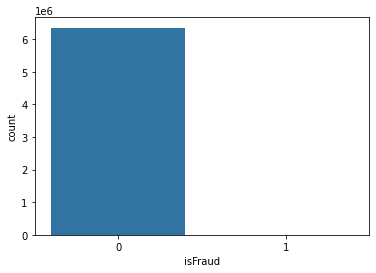

In [53]:
# Most of transactions is non-Fraud

sns.countplot(df1['isFraud']);

### 3.1.1 Numerical attributes

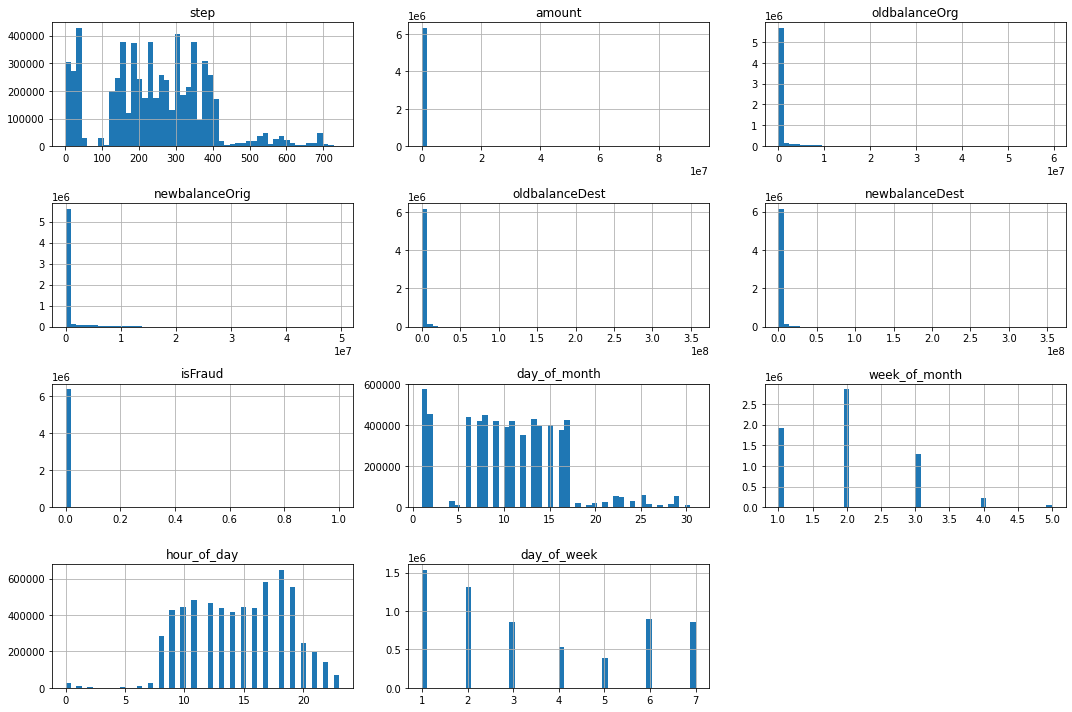

In [54]:
df1.select_dtypes(['float64', 'int64']).hist(figsize=(15,10), bins=50);
plt.tight_layout()

### 3.1.1 Categorical attributes

In [55]:
cat_attrib = df1.select_dtypes(exclude=['int64','float64'])

cat_attrib = cat_attrib.drop(columns=['nameOrig', 'nameDest'])

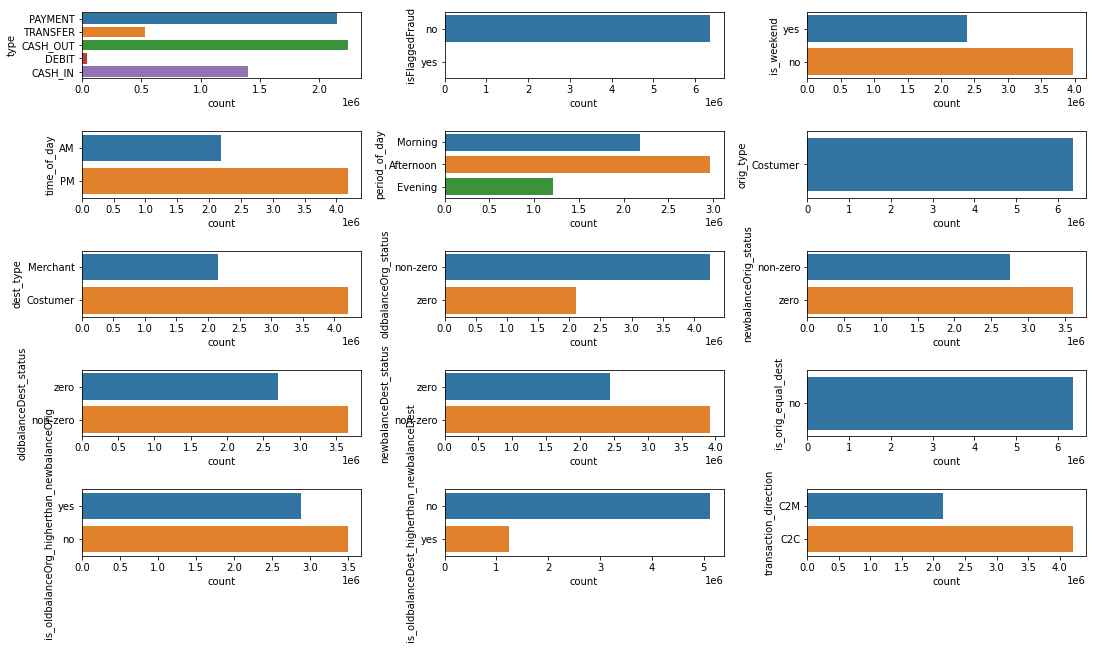

In [76]:
# sets plot size
plt.figure(figsize=(18, 10))

# sets the inital plot position
n = 1

# iterates over the columns to plot
for i in cat_attrib.columns:
    plt.subplot(5, 3, n)
    _ = sns.countplot(y=cat_attrib[i])
    n += 1

# adjust height and wdith reserved for space between subplots  
plt.subplots_adjust(hspace=0.8)
plt.subplots_adjust(wspace=0.3)

# # display the plot
plt.show()

## 3.2 Bivariate analysis

Validating hipothesis raised:

- <b>Transaction type:</b><br>
  **1.** cash out and transfer are responsible for most of fraud transactions<br>
  <br>
- <b>Transaction time:</b><br>
  **2.** fraud happens mostly AM<br>
  **3.** fraud happens mostly in the morning<br>
  **4.** fraud happens mostly during weekdays<br>
  **5.** fraud transactions frequencies follow the trend of non-fraud transactions.<br>
  <br>
- <b>Transaction origin:</b><br>
  **6.** most fraud transactions happen when origin old balance is non-zero<br>
  **7.** most fraud transactions happen when origin new balance is zero<br>
  <br>
- <b>Transaction destination:</b><br>
  **8.** most fraud transactions happen when destination new balance is non-zero<br>
  **9.** most fraud happens for costumer as destination type<br>
  <br>
- <b>Transaction amount:</b><br>
  **10.** the average 'amount' of fraud transactions is higher than non-fraud transactions<br>
  <br>
- <b>Transaction direction:</b><br>
  **11.** most fraud transactions happen in C2C direction<br>
  <br>
- <b>Flagging:</b><br>
  **12.** most of fraud transactions are not flagged


- <b><font color="brown">Transaction type:</font></b><br>
  **1.** cash out and transfer are responsible for most of fraud transactions<br>
  <b>ANSWER:</b> <i>for fraud transactions there are no 'PAYMENT', 'DEBIT', 'CASH_IN' transactions, just 'TRANSFER', 'CASH_OUT', which represents almost 50% each.</i>

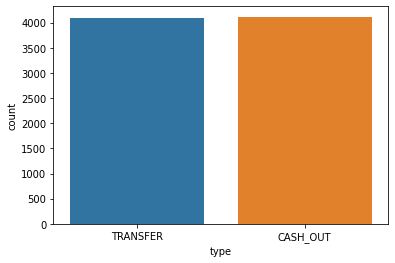

In [78]:
sns.countplot(df1.loc[df1['isFraud']==1,'type'])


- <b><font color="green">Transaction time:</font></b><br>
  **2.** fraud happens mostly AM<br>
  <b>ANSWER:</b> <i>TRUE. Fraud transactions mostly happen AM.</i>

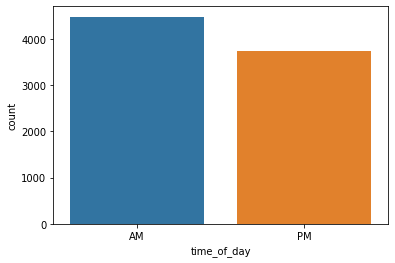

In [83]:
sns.countplot(df1.loc[df1['isFraud']==1,'time_of_day'])

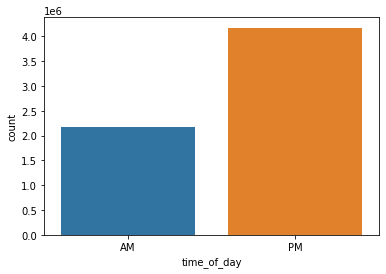

In [86]:
# Non-fraud transactions, however, happen in the opposite direction

sns.countplot(df1.loc[df1['isFraud']==0,'time_of_day'])


- <b><font color="green">Transaction time:</font></b><br>
  **3.** fraud happens mostly in the morning<br>
  <b>ANSWER:</b> <i>TRUE. Fraud transactions mostly happen in the morning.</i>

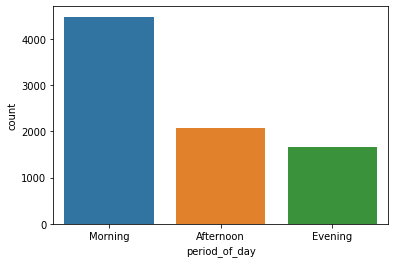

In [84]:
sns.countplot(df1.loc[df1['isFraud']==1,'period_of_day'])

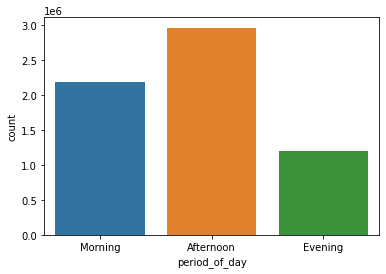

In [85]:
# Compared to non-Fraud transactions which happen mostly in the afternoon

sns.countplot(df1.loc[df1['isFraud']==0,'period_of_day'])


- <b><font color="green">Transaction time:</font></b><br>
  **4.** fraud happens mostly during weekdays<br>
  <b>ANSWER:</b> <i>True. Fraud happens mostly during weekdays</i>

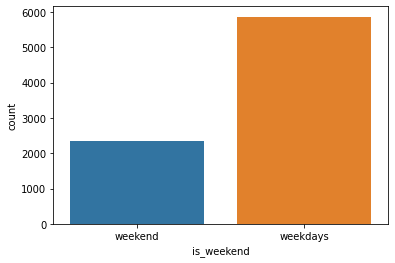

In [92]:
sns.countplot(df1.loc[df1['isFraud']==1,'is_weekend'])

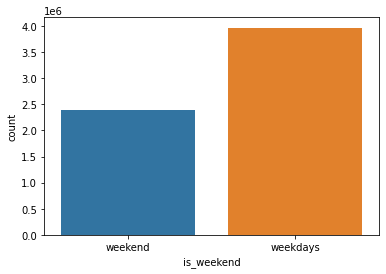

In [93]:
# Non-fraud transactions have the same behaviour

sns.countplot(df1.loc[df1['isFraud']==0,'is_weekend'])


- <b><font color="green">Transaction time:</font></b><br>
  **5.** fraud transactions frequencies follow the trend of non-Fraud transactions.<br>
  <b>ANSWER:</b> <i>False. Fraud happens with diferent frequencie distribution.</i>

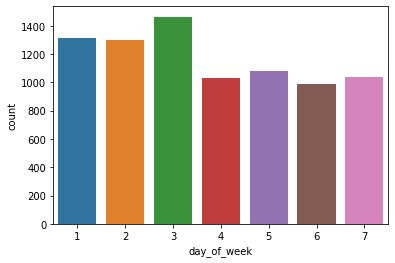

In [117]:
sns.countplot(df1.loc[df1['isFraud']==1,'day_of_week'])

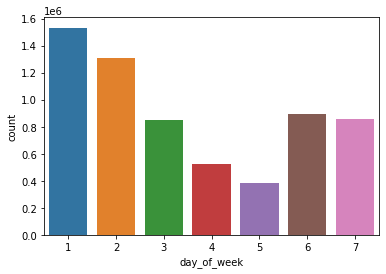

In [118]:
sns.countplot(df1.loc[df1['isFraud']==0,'day_of_week'])


- <b><font color="brown">Transaction origin:</font></b><br>
  **6.** most fraud transactions happen when origin old balance is non-zero<br>
  <b>ANSWER:</b> <i>True. Althought there are some frauds where the Origin old balance is zero, the majority of fraud events happened when it was non-zero.</i>

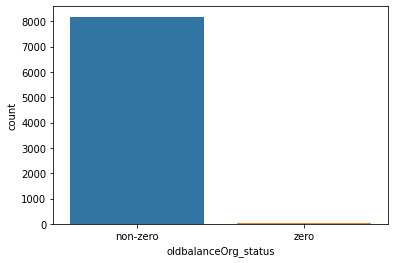

In [95]:
sns.countplot(df1.loc[df1['isFraud']==1,'oldbalanceOrg_status'])


- <b><font color="brown">Transaction origin:</font></b><br>
  **7.** most fraud transactions happen when origin new balance is zero<br>
  <b>ANSWER:</b> <i>True. After most fraud transactions the remaining origin balance is zero.</i>

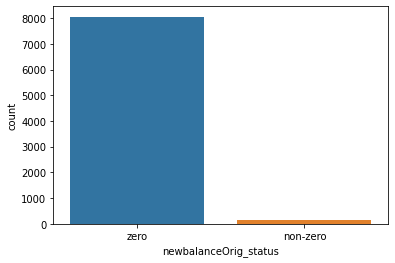

In [98]:
sns.countplot(df1.loc[df1['isFraud']==1,'newbalanceOrig_status'])


- <b><font color= "green">Transaction destination:</font></b><br>
  **8.** most fraud transactions happen when destination new balance is non-zero<br>
  <b>ANSWER:</b> <i>False. For both zero and non-zero remaining balance they are equally frequent.</i>

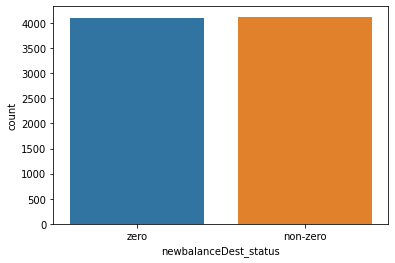

In [101]:
sns.countplot(df1.loc[df1['isFraud']==1,'newbalanceDest_status'])

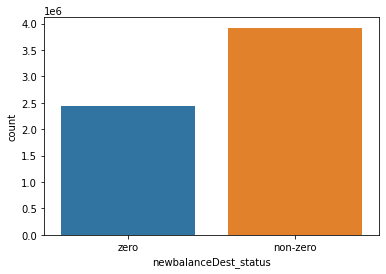

In [102]:
# For non-fraud though, non-zero remaining balance is the most frequent after transaction.

sns.countplot(df1.loc[df1['isFraud']==0,'newbalanceDest_status'])


- <b><font color= "green">Transaction destination:</font></b><br>
  **9.** most fraud happens for costumer as destination type<br>
  <b>ANSWER:</b> <i>True. Fraud ONLY happens for Costumers as destination.</i>

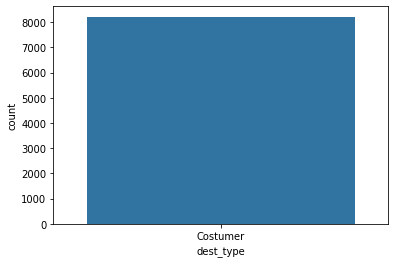

In [103]:
sns.countplot(df1.loc[df1['isFraud']==1,'dest_type'])


- <b><font color="brown">Transaction amount:</font></b><br>
  **10.** the average 'amount' of fraud transactions is higher than non-fraud transactions<br>
  <b>ANSWER:</b> <i>True.</i>

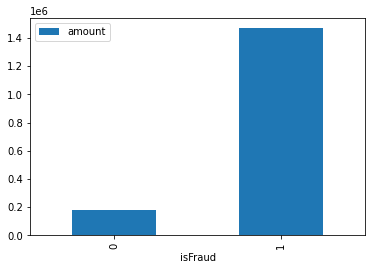

In [108]:
df1[['isFraud', 'amount']].groupby('isFraud').mean().plot.bar();

In [100]:
df1.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,day_of_month,week_of_month,hour_of_day,day_of_week,is_weekend,time_of_day,period_of_day,orig_type,dest_type,oldbalanceOrg_status,newbalanceOrig_status,oldbalanceDest_status,newbalanceDest_status,is_orig_equal_dest,is_oldbalanceOrg_higherthan_newbalanceOrig,is_oldbalanceDest_higherthan_newbalanceDest,transaction_direction
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,no,1,1,0,1,weekend,AM,Morning,Costumer,Merchant,non-zero,non-zero,zero,zero,no,yes,no,C2M
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,no,1,1,0,1,weekend,AM,Morning,Costumer,Merchant,non-zero,non-zero,zero,zero,no,yes,no,C2M
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,no,1,1,0,1,weekend,AM,Morning,Costumer,Costumer,non-zero,zero,zero,zero,no,yes,no,C2C
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,no,1,1,0,1,weekend,AM,Morning,Costumer,Costumer,non-zero,zero,non-zero,zero,no,yes,yes,C2C
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,no,1,1,0,1,weekend,AM,Morning,Costumer,Merchant,non-zero,non-zero,zero,zero,no,yes,no,C2M



- <b><font color="green">Transaction direction:</font></b><br>
  **11.** most fraud transactions happen in C2C direction<br>
  <b>ANSWER:</b> <i>Answer here.</i>


- <b><font color="brown">Flagging:</font></b><br>
  **12.** most of fraud transactions is not flagged<br>
  <b>ANSWER:</b> <i>Answer here.</i>

In [ ]:
# Após terminar a EDA anotar aqui as features possivelmente importantes segundo as hipóteses levantadas




# Data Preparation

# Feature Selection

# Machine Learning

# <font face="Arial" color="red">Racunhos</font>

In [ ]:
# LEMBRETES GERAIS:

# eliminar dados duplicados - OK

# fazer teste de hipótese (teste t) na análise bivariada


# Checklist geral: ==================================================================


# Limpeza dos dados - OK

# Substituicao de dados faltantes - OK

# Criacao de features para modelar o fenomeno - OK

# EDA

# Desbalanceamento dos dados

# Escala dos dados

# Selecao de features

# Vies do modelo



# Limitações do projeto: =============================================================


# Dataset de apenas 1 mês (comportamento de fraude de diferentes meses não capturado)

